# Data Extraction

In [1]:
#import all libaries
import mysql.connector
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Try to connection establish jupyter notebook to Mysql databases
cnx = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = '1996',
    database = 'online_fraud'
)

In [3]:
cursor = cnx.cursor()
query = 'SELECT * FROM online_fraud.fraud'
cursor.execute(query)

result = cursor.fetchall()

In [4]:
df = pd.DataFrame(result, columns=['step','type','amount','name','oldblanceOrg','newblanceOrg','nameDest','oldblanceDest','newblanceDest','isfraud', 'isflaggedfraud'])
df

,step,type,amount,name,oldblanceOrg,newblanceOrg,nameDest,oldblanceDest,newblanceDest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
255080,14,PAYMENT,15463.59,C1232166736,0.0,0.00,M202288424,0.0,0.0,0,0
255081,14,PAYMENT,4732.62,C1525254079,0.0,0.00,M315586261,0.0,0.0,0,0
255082,14,PAYMENT,639.67,C1359421443,0.0,0.00,M681156838,0.0,0.0,0,0
255083,14,PAYMENT,14976.65,C1054547509,0.0,0.00,M1472970469,0.0,0.0,0,0


# Data Preparation


Want to all columns name and find any null values are present are not 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255085 entries, 0 to 255084
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            255085 non-null  int64  
 1   type            255085 non-null  object 
 2   amount          255085 non-null  float64
 3   name            255085 non-null  object 
 4   oldblanceOrg    255085 non-null  float64
 5   newblanceOrg    255085 non-null  float64
 6   nameDest        255085 non-null  object 
 7   oldblanceDest   255085 non-null  float64
 8   newblanceDest   255085 non-null  float64
 9   isfraud         255085 non-null  int64  
 10  isflaggedfraud  255085 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 21.4+ MB


## What are the different types of transactions present in the dataset, and what is the distribution of each transaction type?

Extract the unique transaction types from the dataset and count the occurrences of each type.
Visualize the distribution of transaction types using a bar chart or pie chart.

In [6]:
transition_type = df['type'].value_counts()
transition_type

type
PAYMENT     90651
CASH_OUT    87579
CASH_IN     53514
TRANSFER    21376
DEBIT        1965
Name: count, dtype: int64

Text(0, 0.5, 'Count')

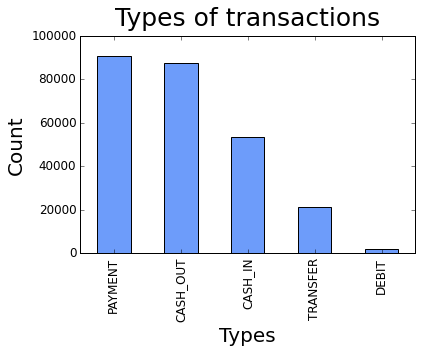

In [7]:
plt.figure(figsize=(6,4))
plt.style.use('classic')
transition_type.plot(kind = 'bar', color = '#6D9CFA')
plt.title('Types of transactions', fontsize = 25, pad = 10)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

## How does the transaction amount vary across different transaction types? Can you visualize this relationship?

Group the data by transaction type and calculate the average or median transaction amount for each type.
Visualize the relationship using a bar chart or box plot.

In [8]:
transition_amounts = df.groupby('type')['amount'].mean()
transition_amounts

type
CASH_IN     181429.711295
CASH_OUT    201335.161003
DEBIT         8421.512601
PAYMENT      11980.499806
TRANSFER    802403.710068
Name: amount, dtype: float64

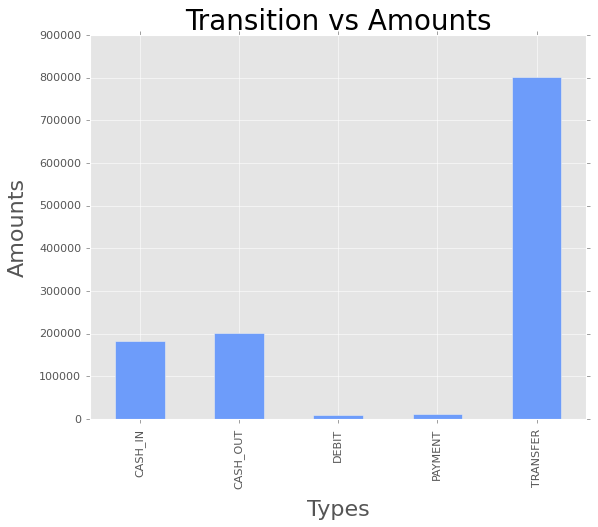

In [9]:
plt.style.use('ggplot')
plt.figure(figsize = (8,6))
transition_amounts.plot(kind='bar',color = '#6D9CFA')
plt.title('Transition vs Amounts', fontsize = 25)
plt.xlabel('Types', labelpad = 10, fontsize = 20)
plt.ylabel('Amounts', labelpad=10, fontsize = 20)
plt.show()

## Is there any correlation between the old balance of the origin account and the transaction amount? How does it differ for fraudulent and non-fraudulent transactions?

Analyze the correlation between the old balance and transaction amount for both fraudulent and non-fraudulent transactions.
Visualize the correlations using scatter plots or box plots.

In [10]:
df['isfraud'].value_counts()

isfraud
0    254922
1       163
Name: count, dtype: int64

In [11]:
fraud_data = df[df['isfraud'] ==1]

In [12]:
non_fraud_data = df[df['isfraud'] ==0]

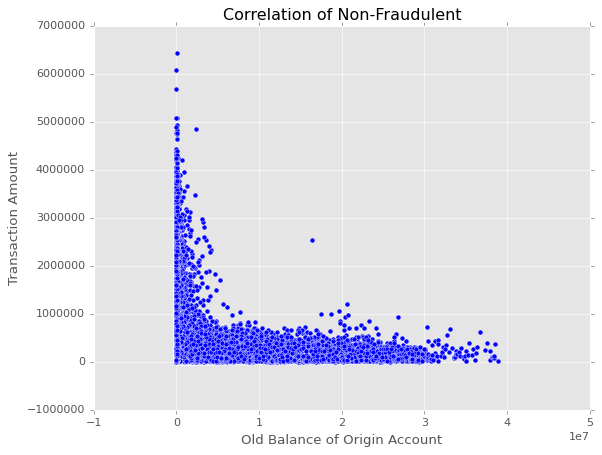

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=non_fraud_data, x='oldblanceOrg', y='amount')
plt.title('Correlation of Non-Fraudulent')
plt.xlabel('Old Balance of Origin Account')
plt.ylabel('Transaction Amount')
plt.show()

Text(0, 0.5, 'Amount')

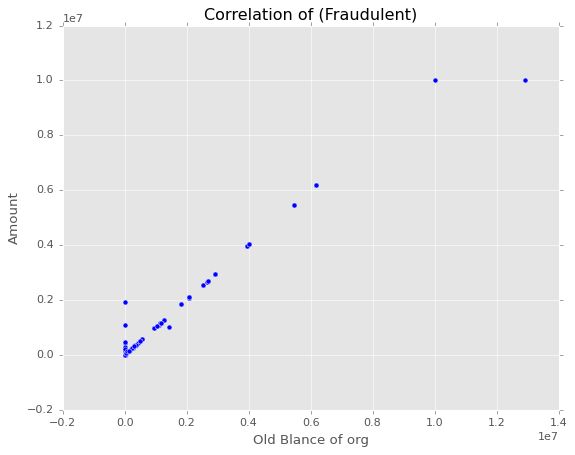

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
sns.scatterplot(data=fraud_data, x='oldblanceOrg', y='amount')
plt.title('Correlation of (Fraudulent)')
plt.xlabel('Old Blance of org')
plt.ylabel('Amount')

## Can you identify any patterns in the destination account names? Are there any frequently occurring destination account names?

In [15]:
destination_names = df['name']

In [16]:
name_dest_counts = destination_names.value_counts()

In [17]:
top_occuring_names=name_dest_counts.head()
top_occuring_names

name
C44568807      2
C745009740     2
C1709295811    2
C779875094     2
C189326840     2
Name: count, dtype: int64

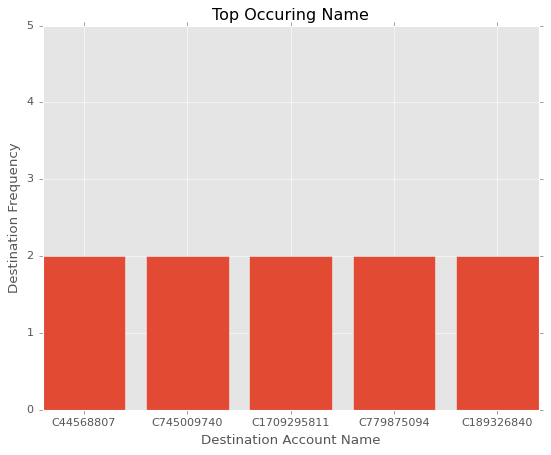

In [18]:
plt.bar(top_occuring_names.index, top_occuring_names.values)
plt.title('Top Occuring Name')
plt.xlabel('Destination Account Name')
plt.ylabel('Destination Frequency')
plt.ylim(0,5)
plt.show()